<a href="https://colab.research.google.com/github/WisudantyoWahyu/SISTEM-CERDAS/blob/main/classify_class_site_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [5]:
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# from sklearn.datasets import load_iris

In [6]:
# from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('dataset2.csv')
# df = pd.read_excel("xxx.xls", sheet_name="sheet 1")
df.head()

,Site,Payload Total (GB),Traffic,Subs,Revenue,Class Rev
0,Site 1,30419,1765,1414,134017424,Gold
1,Site 2,13872,1685,731,62952270,Silver
2,Site 3,28531,1070,1206,120884649,Gold
3,Site 4,10777,911,761,54450496,Bronze
4,Site 5,10990,1418,934,53238883,Bronze


In [8]:
test_X = df.iloc[0:10,[1,2,3,4]].values
print(test_X.shape)

(10, 4)


In [9]:
X = df.iloc[:,[1,2,3,4]].values
Y = df.iloc[:,[5]].values

In [ ]:
print(Y)

In [12]:
print(X)

[[    30419      1765      1414 134017424]
 [    13872      1685       731  62952270]
 [    28531      1070      1206 120884649]
 ...
 [    35575      3362      2371 196835590]
 [    12478      1608       901  65676942]
 [    45273      3988      3439 226109950]]


In [13]:
target_names = df['Class Rev'].unique()
print(target_names)

['Gold' 'Silver' 'Bronze' 'Diamond' 'Platinum']


In [14]:
print(X.shape)
print(Y.shape)

(593, 4)
(593, 1)


In [15]:
(trainX, testX, trainY, testY) = train_test_split(X, Y, random_state=3, test_size=0.2)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(474, 4)
(119, 4)
(474, 1)
(119, 1)


In [16]:
# define the dictionary of models our script can use, where the key
# to the dictionary is the name of the model (supplied via command
# line argument) and the value is the model itself
models = {
	"knn": KNeighborsClassifier(n_neighbors=3),
	"naive_bayes": GaussianNB(),
	"logit": LogisticRegression(solver="lbfgs", multi_class="auto"),
	"svm": SVC(kernel="rbf", gamma="auto"),
	"decision_tree": DecisionTreeClassifier(),
	"random_forest": RandomForestClassifier(n_estimators=100),
	"mlp": MLPClassifier()
}

In [20]:
# train the model
#print("[INFO] using '{}' model".format("knn"))
#model = models["knn"]
#model.fit(trainX, trainY)

In [21]:
# train the model
print("[INFO] using '{}' model".format("naive_bayes"))
model = models["naive_bayes"]
model.fit(trainX, trainY)

[INFO] using 'naive_bayes' model


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [22]:
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(predictions)

[INFO] evaluating...
['Silver' 'Silver' 'Gold' 'Gold' 'Gold' 'Silver' 'Silver' 'Bronze'
 'Silver' 'Silver' 'Silver' 'Gold' 'Silver' 'Gold' 'Gold' 'Silver' 'Gold'
 'Gold' 'Platinum' 'Bronze' 'Gold' 'Platinum' 'Gold' 'Silver' 'Bronze'
 'Silver' 'Silver' 'Gold' 'Silver' 'Silver' 'Gold' 'Silver' 'Silver'
 'Gold' 'Gold' 'Bronze' 'Gold' 'Gold' 'Platinum' 'Gold' 'Silver' 'Silver'
 'Silver' 'Gold' 'Silver' 'Bronze' 'Bronze' 'Gold' 'Gold' 'Bronze' 'Gold'
 'Silver' 'Bronze' 'Silver' 'Platinum' 'Gold' 'Platinum' 'Gold' 'Silver'
 'Silver' 'Bronze' 'Gold' 'Gold' 'Bronze' 'Silver' 'Silver' 'Silver'
 'Gold' 'Bronze' 'Gold' 'Bronze' 'Bronze' 'Gold' 'Gold' 'Gold' 'Platinum'
 'Bronze' 'Silver' 'Gold' 'Silver' 'Gold' 'Gold' 'Silver' 'Diamond'
 'Platinum' 'Gold' 'Bronze' 'Bronze' 'Gold' 'Bronze' 'Silver' 'Gold'
 'Silver' 'Silver' 'Gold' 'Gold' 'Silver' 'Gold' 'Gold' 'Gold' 'Silver'
 'Silver' 'Gold' 'Gold' 'Gold' 'Silver' 'Silver' 'Bronze' 'Bronze'
 'Silver' 'Bronze' 'Gold' 'Silver' 'Gold' 'Gold' 'Bronze' 

In [23]:
print(classification_report(testY, predictions,
	target_names=target_names))

              precision    recall  f1-score   support

        Gold       1.00      0.95      0.98        22
      Silver       0.00      0.00      0.00         0
      Bronze       1.00      0.86      0.92        57
     Diamond       0.57      0.80      0.67         5
    Platinum       0.85      1.00      0.92        35

    accuracy                           0.92       119
   macro avg       0.69      0.72      0.70       119
weighted avg       0.94      0.92      0.92       119



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
# train the model
print("[INFO] using '{}' model".format("naive_bayes"))
model = models["naive_bayes"]
model.fit(trainX, trainY)

[INFO] using 'naive_bayes' model


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [25]:
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(classification_report(testY, predictions,
	target_names=target_names))

[INFO] evaluating...
              precision    recall  f1-score   support

        Gold       1.00      0.95      0.98        22
      Silver       0.00      0.00      0.00         0
      Bronze       1.00      0.86      0.92        57
     Diamond       0.57      0.80      0.67         5
    Platinum       0.85      1.00      0.92        35

    accuracy                           0.92       119
   macro avg       0.69      0.72      0.70       119
weighted avg       0.94      0.92      0.92       119



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
# train the model
print("[INFO] using '{}' model".format("logit"))
model = models["logit"]
model.fit(trainX, trainY)

[INFO] using 'logit' model


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [27]:
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(classification_report(testY, predictions,
	target_names=target_names))

[INFO] evaluating...


ValueError: ignored

In [28]:
# train the model
print("[INFO] using '{}' model".format("svm"))
model = models["svm"]
model.fit(trainX, trainY)

[INFO] using 'svm' model


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma='auto')

In [29]:
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(classification_report(testY, predictions,
	target_names=target_names))

[INFO] evaluating...


ValueError: ignored

In [30]:
# train the model
print("[INFO] using '{}' model".format("decision_tree"))
model = models["decision_tree"]
model.fit(trainX, trainY)

[INFO] using 'decision_tree' model


DecisionTreeClassifier()

In [31]:
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(classification_report(testY, predictions,
	target_names=target_names))

[INFO] evaluating...


ValueError: ignored

In [32]:
# train the model
print("[INFO] using '{}' model".format("random_forest"))
model = models["random_forest"]
model.fit(trainX, trainY)

[INFO] using 'random_forest' model


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier()

In [33]:
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(classification_report(testY, predictions,
	target_names=target_names))

[INFO] evaluating...


ValueError: ignored

In [34]:
# train the model
print("[INFO] using '{}' model".format("mlp"))
model = models["mlp"]
model.fit(trainX, trainY)

[INFO] using 'mlp' model


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier()

In [35]:
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(classification_report(testY, predictions,
	target_names=target_names))

[INFO] evaluating...


ValueError: ignored

# **Artificial Neural Network**

In [37]:
# import the necessary packages
from keras.models import Sequential
# from keras.layers.convolutional import Conv2D
# from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
# from keras.layers.core import Flatten
from keras.layers.core import Dense
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from PIL import Image
# from imutils import paths
# import numpy as np
# import os

In [ ]:
Y

In [39]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(Y)
print(labels)

[[0 0 1 0 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 ...
 [0 0 1 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]]


In [75]:
(trainX, testX, trainY, testY) = train_test_split(X,	np.array(labels), test_size=0.1)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(533, 4)
(60, 4)
(533, 5)
(60, 5)


In [114]:
#model ANN

model = Sequential(
    [
        Dense(64, activation="relu", input_shape=(4,)), #hidden layer 1
        Dense(32, activation="relu"), #hidden layer 2
        Dense(16, activation="relu"),
        #Dense(8, activation="relu"),
        Dense(5, activation = "sigmoid"),
    ]
)

In [115]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 64)                320       
                                                                 
 dense_59 (Dense)            (None, 32)                2080      
                                                                 
 dense_60 (Dense)            (None, 16)                528       
                                                                 
 dense_61 (Dense)            (None, 5)                 85        
                                                                 
Total params: 3,013
Trainable params: 3,013
Non-trainable params: 0
_________________________________________________________________


In [116]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-5, decay=1e-5 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt, #2 kelas --> binary_crossentropy
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=20, batch_size=20)

[INFO] training network...
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


27/27 [==============================] - 1s 9ms/step - loss: 16179331.0000 - accuracy: 0.0450 - val_loss: 19860570.0000 - val_accuracy: 0.0667
Epoch 2/20
27/27 [==============================] - 0s 3ms/step - loss: 15624847.0000 - accuracy: 0.0450 - val_loss: 19223702.0000 - val_accuracy: 0.0667
Epoch 3/20
27/27 [==============================] - 0s 3ms/step - loss: 15070340.0000 - accuracy: 0.0450 - val_loss: 18591522.0000 - val_accuracy: 0.0667
Epoch 4/20
27/27 [==============================] - 0s 3ms/step - loss: 14519990.0000 - accuracy: 0.0450 - val_loss: 17961884.0000 - val_accuracy: 0.0667
Epoch 5/20
27/27 [==============================] - 0s 3ms/step - loss: 13970324.0000 - accuracy: 0.0450 - val_loss: 17336526.0000 - val_accuracy: 0.0667
Epoch 6/20
27/27 [==============================] - 0s 4ms/step - loss: 13424558.0000 - accuracy: 0.0450 - val_loss: 16709499.0000 - val_accuracy: 0.0667
Epoch 7/20
27/27 [==============================] - 0s 3ms/step - loss: 12877735.0000 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


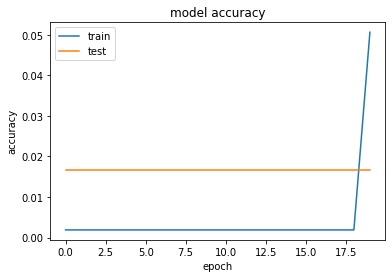

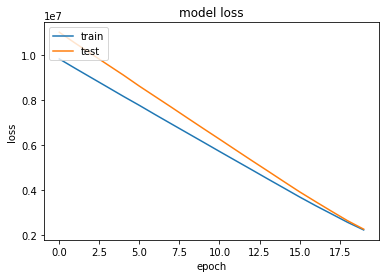

In [113]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()